# EXPLORATORY DATA ANALYSIS FOR DIFFERENT USAGE OF MOBILE HEALTH APPLICATION

## Importing Libraries

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white',color_codes=True)
%matplotlib inline
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D


## Reading the Dataset

In [3]:
#Read in the dataset
df1 = pd.read_csv('C:/datasets/mHealth.csv', encoding = 'latin1')
#Latin 1 encoding is to interpret special character, to read in the file without producing error
df1


,MID,DAY,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000003e+09,6/8/2022 20:58,2.0,56.0,6.0,14.0,3.0,8.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000004e+09,6/8/2022 22:17,1.0,64.0,7.0,13.0,3.0,6.0,2.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1.010023e+09,6/8/2022 19:31,2.0,42.0,5.0,23.0,4.0,9.0,1.0,2.0,...,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,3.0
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,1.010023e+09,6/8/2022 19:20,2.0,48.0,5.0,3.0,2.0,3.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2 = df1.drop("q3t6", axis=1)#Drop"q3t6" column from the dataframe
print (df2.count())#Returns the number of non null values in each data frame column

MID      841
DAY      841
SEX      841
AGE      841
GEN      841
PRE      841
ARE      841
JOB      841
MAR      841
CHI      841
q1t1     413
q2c1     841
q2c2     841
q2c3     841
q2c4     841
q3       632
q4s1     632
q4s2     632
q4s3     632
q4s4     632
q4s5     632
q4s6     632
q4s7     632
q4s8     632
q4s9     632
q4s10    632
q4s11    632
q4s12    632
q4s13    632
q4s14    632
q4s15    632
q5       632
dtype: int64


In [5]:
df2.head() #Display the first five rows in the dataset

,MID,DAY,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000003e+09,6/8/2022 20:58,2.0,56.0,6.0,14.0,3.0,8.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000004e+09,6/8/2022 22:17,1.0,64.0,7.0,13.0,3.0,6.0,2.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [6]:
#To drop duplicate value
df2 = df2.drop_duplicates()
df2.info()#Summary of a ssdataframe(total number of rows in the dataset, names of the columns, their datatype, and any missing value.)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 1681
Data columns (total 32 columns):
MID      841 non-null float64
DAY      841 non-null object
SEX      841 non-null float64
AGE      841 non-null float64
GEN      841 non-null float64
PRE      841 non-null float64
ARE      841 non-null float64
JOB      841 non-null float64
MAR      841 non-null float64
CHI      841 non-null float64
q1t1     413 non-null object
q2c1     841 non-null float64
q2c2     841 non-null float64
q2c3     841 non-null float64
q2c4     841 non-null float64
q3       632 non-null float64
q4s1     632 non-null float64
q4s2     632 non-null float64
q4s3     632 non-null float64
q4s4     632 non-null float64
q4s5     632 non-null float64
q4s6     632 non-null float64
q4s7     632 non-null float64
q4s8     632 non-null float64
q4s9     632 non-null float64
q4s10    632 non-null float64
q4s11    632 non-null float64
q4s12    632 non-null float64
q4s13    632 non-null float64
q4s14    632 non-null floa

In [7]:
# To drop all rows that are completely empty
df= df2.dropna()

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 1 to 1681
Data columns (total 32 columns):
MID      368 non-null float64
DAY      368 non-null object
SEX      368 non-null float64
AGE      368 non-null float64
GEN      368 non-null float64
PRE      368 non-null float64
ARE      368 non-null float64
JOB      368 non-null float64
MAR      368 non-null float64
CHI      368 non-null float64
q1t1     368 non-null object
q2c1     368 non-null float64
q2c2     368 non-null float64
q2c3     368 non-null float64
q2c4     368 non-null float64
q3       368 non-null float64
q4s1     368 non-null float64
q4s2     368 non-null float64
q4s3     368 non-null float64
q4s4     368 non-null float64
q4s5     368 non-null float64
q4s6     368 non-null float64
q4s7     368 non-null float64
q4s8     368 non-null float64
q4s9     368 non-null float64
q4s10    368 non-null float64
q4s11    368 non-null float64
q4s12    368 non-null float64
q4s13    368 non-null float64
q4s14    368 non-null floa

In [9]:
#Analyzing String Pattern Only
df.describe(include=[np.object])

,DAY,q1t1
count,368,368
unique,155,139
top,6/8/2022 19:02,Healthcare
freq,8,29


In [10]:
df #dataframe

,MID,DAY,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
1,1.000003e+09,6/8/2022 20:58,2.0,56.0,6.0,14.0,3.0,8.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0
7,1.000004e+09,6/8/2022 19:30,2.0,54.0,6.0,13.0,3.0,9.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0
15,1.000009e+09,6/8/2022 20:08,2.0,60.0,7.0,27.0,5.0,4.0,1.0,2.0,...,3.0,2.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
19,1.000009e+09,6/8/2022 19:15,2.0,60.0,7.0,23.0,4.0,6.0,2.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0
25,1.000014e+09,6/8/2022 19:53,2.0,65.0,7.0,14.0,3.0,8.0,2.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,1.009988e+09,6/8/2022 21:20,2.0,32.0,4.0,4.0,2.0,7.0,1.0,2.0,...,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0
1661,1.009995e+09,6/8/2022 21:59,1.0,24.0,3.0,8.0,3.0,9.0,1.0,2.0,...,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0
1665,1.010001e+09,6/8/2022 19:13,2.0,46.0,5.0,14.0,3.0,8.0,1.0,1.0,...,3.0,3.0,3.0,3.0,2.0,1.0,3.0,2.0,2.0,3.0
1679,1.010023e+09,6/8/2022 19:20,2.0,48.0,5.0,3.0,2.0,3.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0


In [11]:
#Statistical Analysis of the dataset.
df.describe()

,MID,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,q2c1,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
count,3.680000e+02,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.00000,368.000000,368.00000,368.000000,368.000000,368.000000
mean,1.005594e+09,1.546196,45.959239,5.105978,20.480978,4.165761,6.432065,1.611413,1.472826,0.573370,...,2.720109,2.554348,2.687500,2.711957,2.55163,2.750000,2.76087,2.521739,2.676630,2.720109
std,3.104661e+06,0.498539,13.681108,1.302760,11.127435,1.722498,2.836268,0.488093,0.499941,0.495261,...,0.916353,0.908502,0.856236,0.827766,0.88126,0.830285,0.84324,0.857450,0.883576,0.609129
min,1.000003e+09,1.000000,18.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,1.003129e+09,1.000000,35.000000,4.000000,13.000000,3.000000,4.000000,1.000000,1.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.00000,2.000000,2.000000,3.000000
50%,1.005871e+09,2.000000,47.000000,5.000000,19.500000,4.000000,6.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.00000,3.000000,3.00000,2.000000,3.000000,3.000000
75%,1.008132e+09,2.000000,56.000000,6.000000,27.000000,5.000000,9.000000,2.000000,2.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.00000,3.000000,3.000000,3.000000
max,1.010036e+09,2.000000,79.000000,7.000000,47.000000,8.000000,11.000000,2.000000,2.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,3.000000


In [12]:
df.corr()#Correlation of the dataset

,MID,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,q2c1,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
MID,1.000000,0.119598,-0.440913,-0.407726,0.102707,0.109301,0.027633,-0.161392,0.092942,0.150589,...,-0.123282,-0.129566,-0.091530,-0.050358,-0.079520,-0.131073,-0.106374,-0.128421,-0.149154,-0.111206
SEX,0.119598,1.000000,-0.279171,-0.282355,-0.001806,0.005337,0.335601,-0.054802,0.054246,0.162807,...,-0.028283,-0.038646,-0.071412,-0.007285,0.000758,-0.044434,0.000423,-0.050162,-0.006203,0.029235
AGE,-0.440913,-0.279171,1.000000,0.967815,-0.062731,-0.052669,0.060775,0.320387,-0.323844,-0.238630,...,0.107325,0.118888,0.078926,0.036254,0.034640,0.122636,0.132600,0.074520,0.092451,0.106199
GEN,-0.407726,-0.282355,0.967815,1.000000,-0.051269,-0.045492,0.035507,0.330621,-0.340714,-0.254915,...,0.091107,0.111382,0.078625,0.033438,0.034382,0.110210,0.114906,0.074769,0.081930,0.099287
PRE,0.102707,-0.001806,-0.062731,-0.051269,1.000000,0.978161,-0.018085,-0.057805,0.023662,0.025470,...,0.018316,0.028808,0.014389,0.008870,0.047060,-0.013493,0.005322,0.004756,0.007825,-0.014255
ARE,0.109301,0.005337,-0.052669,-0.045492,0.978161,1.000000,-0.003545,-0.078743,0.044797,0.019242,...,-0.011957,0.000322,-0.031292,-0.021842,0.009604,-0.050965,-0.019534,-0.021818,-0.016604,-0.025779
JOB,0.027633,0.335601,0.060775,0.035507,-0.018085,-0.003545,1.000000,-0.049629,-0.002266,-0.025539,...,0.059237,0.106653,0.100629,0.067081,0.047193,0.048308,0.085472,0.028059,0.055904,0.167972
MAR,-0.161392,-0.054802,0.320387,0.330621,-0.057805,-0.078743,-0.049629,1.000000,-0.696625,-0.045180,...,0.018127,0.056973,0.106355,0.072902,0.043603,0.136154,0.051667,0.062559,0.067971,0.027270
CHI,0.092942,0.054246,-0.323844,-0.340714,0.023662,0.044797,-0.002266,-0.696625,1.000000,0.002572,...,-0.090994,-0.116723,-0.137651,-0.104561,-0.043191,-0.121439,-0.060700,-0.100319,-0.072378,-0.029517
q2c1,0.150589,0.162807,-0.238630,-0.254915,0.025470,0.019242,-0.025539,-0.045180,0.002572,1.000000,...,-0.035681,-0.054305,-0.019678,-0.008127,-0.033675,-0.001657,-0.023120,-0.032640,-0.011015,0.000515


## Data Analysis and Visualization

### Grouping the Dataset by Gender

In [13]:
# 1 stands for Male,  2 stands for Female
k= df['SEX'].unique()
df_gen =df.groupby('SEX').count()
df_gen


,MID,DAY,AGE,GEN,PRE,ARE,JOB,MAR,CHI,q1t1,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
SEX,,,,,,,,,,,,,,,,,,,,,
1.0,167,167,167,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,167
2.0,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,201


In [14]:
re1 = df["SEX"].replace({1.0: "Male", 2.0: "Female"}, inplace=True)


C:\Users\user2222\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
#Dataset by Gender in percentage
dataset_byGender = df['SEX'].value_counts(ascending=False)*100/368 #368 is for total data by sex
dataset_byGender

Female    54.619565
Male      45.380435
Name: SEX, dtype: float64

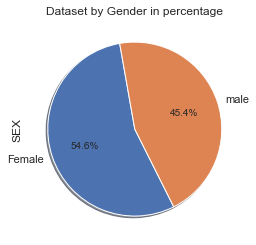

In [16]:
gen = ['Female','male']
dataset_byGender.plot(kind='pie',labels = gen, startangle =100, shadow=True,autopct ='%1.1f%%')
plt.title("Dataset by Gender in percentage")
plt.show()


#### 54.6%of the dataset are females and  45.4% are males

### AGE BAND

In [17]:
re3  = df["GEN"].replace({1.0:"15<", 2.0: "15-19",3.0: "20-29",4.0: "30-39",5.0: "40-49",6.0: "50-59",7.0: "60>="}, inplace=True)
AgeB= df["GEN"].value_counts()

AgeB

50-59    93
40-49    93
30-39    68
60>=     61
20-29    51
15-19     2
Name: GEN, dtype: int64

In [18]:
pen = df['GEN'].value_counts(ascending=False)*100/368
pen

50-59    25.271739
40-49    25.271739
30-39    18.478261
60>=     16.576087
20-29    13.858696
15-19     0.543478
Name: GEN, dtype: float64

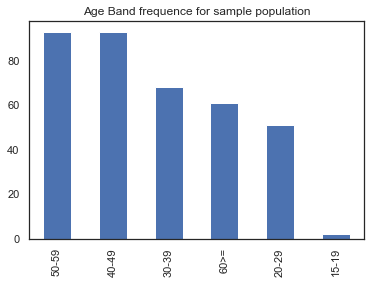

In [19]:
#Age Band
AgeB.plot(kind='bar')
plt.title("Age Band frequence for sample population")
plt.show()

#### Most participants fall into age range of 40-49 and 50-59

### Prefecture

In [20]:
re2  = df["PRE"].replace({1.0: "Hokkaido", 2.0: "Aomori",3.0: "Iwate",4.0: "Miyagi",5.0: "Akita",6.0: "Yamagata",7.0: "Fukushima",8.0: "Ibaragi",9.0: "Tochigi",10.0: "Gunma", 11.0:'Saitama', 12.0:'Chiba', 13.0:'Tokyo', 14.0:'Kanagawa', 15.0:'Niigata', 16.0:'Toyama', 17.0:'Ishikawa', 18.0:'Fukui', 19.0:'Yamanashi', 20.0:'Nagano', 21.0:'Gifu', 22.0:'Shizuoka', 23.0:'Aichi', 24.0:'Mie', 25.0:'Shiga',26.0:'Kyoto',27.0:'Osaka',28.0:'Hyogo',29.0:'Nara',30.0:'Wakayama',31.0:'Tottori',32.0:'Shimane',33.0:'Okayama',34.0:'Hiroshima',35.0:'Yamaguchi',36.0:'Tokushima',37.0:'Kagawa',38.0:'Ehime',39.0:'Kouchi',40.0:'Fukuoka',41.0:'Saga',42.0:'Nagasaki',43.0:'Kumamoto',44.0:'Oita',45.0:'Miyazaki',46.0:'Kagoshima',47.0:'Okinawa' }, inplace=True)
series2 = df["PRE"].value_counts()
series2

Tokyo        48
Kanagawa     36
Osaka        36
Aichi        32
Saitama      19
Hyogo        18
Fukuoka      15
Hokkaido     15
Chiba        14
Gunma         9
Yamaguchi     8
Hiroshima     8
Niigata       8
Kyoto         8
Miyagi        8
Okayama       8
Ibaragi       7
Shiga         6
Shizuoka      5
Oita          5
Tochigi       4
Fukushima     4
Mie           4
Kumamoto      4
Nara          3
Gifu          3
Okinawa       3
Ehime         3
Toyama        2
Nagasaki      2
Akita         2
Yamagata      2
Kagoshima     2
Tokushima     2
Tottori       2
Yamanashi     2
Wakayama      2
Shimane       2
Iwate         1
Aomori        1
Nagano        1
Saga          1
Kouchi        1
Fukui         1
Ishikawa      1
Name: PRE, dtype: int64

In [21]:
pen1 = df['PRE'].value_counts(ascending=False)*100/368
pen1

Tokyo        13.043478
Kanagawa      9.782609
Osaka         9.782609
Aichi         8.695652
Saitama       5.163043
Hyogo         4.891304
Fukuoka       4.076087
Hokkaido      4.076087
Chiba         3.804348
Gunma         2.445652
Yamaguchi     2.173913
Hiroshima     2.173913
Niigata       2.173913
Kyoto         2.173913
Miyagi        2.173913
Okayama       2.173913
Ibaragi       1.902174
Shiga         1.630435
Shizuoka      1.358696
Oita          1.358696
Tochigi       1.086957
Fukushima     1.086957
Mie           1.086957
Kumamoto      1.086957
Nara          0.815217
Gifu          0.815217
Okinawa       0.815217
Ehime         0.815217
Toyama        0.543478
Nagasaki      0.543478
Akita         0.543478
Yamagata      0.543478
Kagoshima     0.543478
Tokushima     0.543478
Tottori       0.543478
Yamanashi     0.543478
Wakayama      0.543478
Shimane       0.543478
Iwate         0.271739
Aomori        0.271739
Nagano        0.271739
Saga          0.271739
Kouchi        0.271739
Fukui      

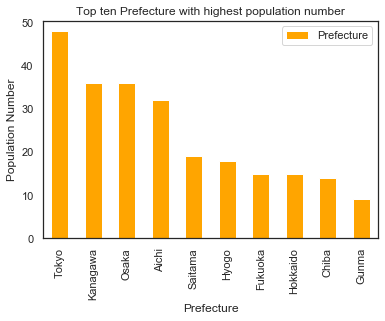

In [22]:
k = series2.head(10)
k.plot(kind='bar',color='orange', label='Prefecture')
plt.title("Top ten Prefecture with highest population number")
plt.xlabel("Prefecture")
plt.ylabel("Population Number")
plt.legend()
plt.show()

### Dataset by Region

In [23]:
re3  = df["ARE"].replace({1.0: "Hokkaido", 2.0: "Tohoku",3.0: "Kanto",4.0: "Chubu",5.0: "Kinki",6.0: "Chugoku",7.0: "Shikoku",8.0: "Kyushu"}, inplace=True)
series3 = df["ARE"].value_counts()
series3

Kanto       137
Kinki        77
Chubu        55
Kyushu       32
Chugoku      28
Tohoku       18
Hokkaido     15
Shikoku       6
Name: ARE, dtype: int64

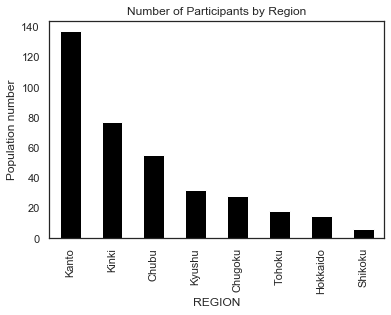

In [24]:
series3.plot(kind='bar',color='black')
plt.title("Number of Participants by Region")
plt.xlabel("REGION")
plt.ylabel("Population number")
plt.show()

#### The highest number of participants is from Kanto Region

### Exploring Occupation

In [25]:
#df['JOB'].astype(str)
re4  = df["JOB"].replace({1.0: "Civil-Servant", 2.0: "Exective",3.0: "Employee(Office based work)",4.0: "Employee(Manual work)",5.0: "Employee(Others)",6.0: "Self-employed",7.0: "Freelancer",8.0: "Housewife",9.0: "Part Time",10.0: "student", 11.0:'Others'}, inplace=True)
series4 = df["JOB"].value_counts()
series4

Part Time                      64
Employee(Office based work)    61
Housewife                      57
Employee(Others)               57
Employee(Manual work)          40
Others                         36
Self-employed                  18
student                        14
Civil-Servant                   9
Freelancer                      6
Exective                        6
Name: JOB, dtype: int64

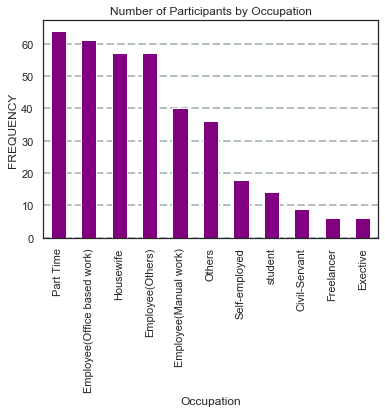

In [26]:
series4.plot(kind='bar', color='purple')
plt.title("Number of Participants by Occupation")
plt.xlabel("Occupation")
plt.ylabel("FREQUENCY")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

### Marital Status

In [27]:
re5 = df["MAR"].replace({1.0: "Single", 2.0: "Married"}, inplace=True)

In [28]:
#Dataset by Marital Status in percentage
dataset_byMaritalStatus = df['MAR'].value_counts(ascending=False)*100/368 
dataset_byMaritalStatus

Married    61.141304
Single     38.858696
Name: MAR, dtype: float64

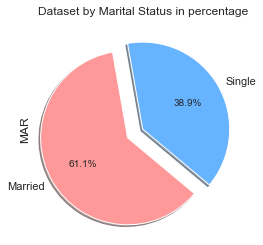

In [29]:
mars = ['Married','Single']
myexplode = [0.2, 0]
colors = ['#ff9999','#66b3ff']
dataset_byMaritalStatus.plot(kind='pie',labels = mars, startangle =100, shadow=True,autopct ='%1.1f%%', explode = myexplode, colors=colors)
plt.title("Dataset by Marital Status in percentage")
plt.show()

### Total number of participants with kids and no kid

In [30]:
re6 = df["CHI"].replace({1.0: "Kids", 2.0: "No Kids"}, inplace=True)
dataset_byKids = df['CHI'].value_counts(ascending=False)*100/368
dataset_byKids

Kids       52.717391
No Kids    47.282609
Name: CHI, dtype: float64

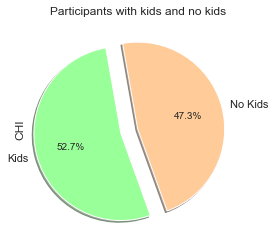

In [31]:
kid = ['Kids','No Kids']
myexplode = [0.2, 0]
colors = ['#99ff99','#ffcc99']
dataset_byKids.plot(kind='pie',labels = kid, startangle =100, shadow=True,autopct ='%1.1f%%', explode = myexplode, colors=colors)
plt.title("Participants with kids and no kids")
plt.show()

### MOBILE OS VERSION

In [32]:
z= df["q2c1"].value_counts()
y= df["q2c2"].value_counts()
x= df["q2c3"].value_counts()
w= df["q2c4"].value_counts()
w

0.0    366
1.0      2
Name: q2c4, dtype: int64

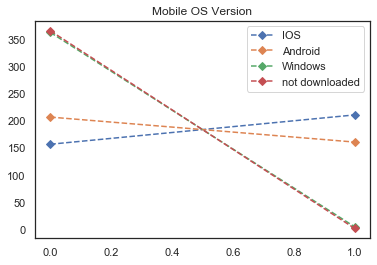

In [33]:
x=[0,1]
q2c1=[157,211]
q2c2=[207,161]
q2c3=[363,5]
q2c4=[366,2]
plt.plot(x,q2c1, linestyle= 'dashed', marker='D', label='IOS')
plt.plot(x,q2c2, linestyle= 'dashed', marker='D', label='Android' )
plt.plot(x,q2c3, linestyle= 'dashed', marker='D', label='Windows' )
plt.plot(x,q2c4, linestyle= 'dashed', marker='D', label='not downloaded' )
plt.title("Mobile OS Version")
plt.legend()
plt.show()

#### Most participants make use of Android O.S Version which was downloaded from online store

### DIFFERENT USE OF THE APPLICATION

In [34]:
diffU  = df["q3"].replace({1.0: "Education", 2.0: "Monitoring",3.0: "Fitness",4.0: "Diagnosis",5.0: "Treatment",6.0: "Other"}, inplace=True)
sdiffU = df["q3"].value_counts()
sdiffU

Monitoring    123
Fitness        73
Other          65
Diagnosis      52
Education      48
Treatment       7
Name: q3, dtype: int64

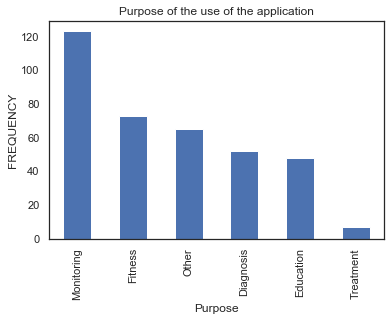

In [49]:
sdiffU.plot(kind='bar')
plt.title("Purpose of the use of the application")
plt.xlabel("Purpose")
plt.ylabel("FREQUENCY")
plt.show()

In [51]:
 Usepercent= df['q3'].value_counts(ascending=False)*100/368
 Usepercent

Monitoring    33.423913
Fitness       19.836957
Other         17.663043
Diagnosis     14.130435
Education     13.043478
Treatment      1.902174
Name: q3, dtype: float64

#### 33.4% of the participants used it for Monitoring, 19.8% used it for Fitness, 14.1% used it for diagnosis, 13% used it for Education, 1.9% used it for Treatment and 17.7% used it for other purpose. 

### ENGAGEMENT -is the app entertaining ?

In [35]:
f= df["q4s2"].value_counts()


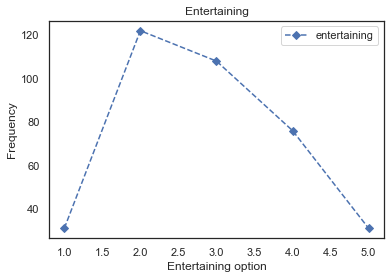

In [36]:
x= [1.0,2.0,3.0,4.0,5.0]
q4s2=[31,122,108,76,31]
plt.plot(x,q4s2, linestyle= 'dashed', marker='D', label='entertaining')
plt.title("Entertaining")
plt.ylabel('Frequency')
plt.xlabel('Entertaining option')
plt.legend()
plt.show()

#### The analysis shows that the app is entertaining.

### FUNCTIONALITY - Performance, Ease of use and Navigation.

In [37]:
#Functionality
b= df["q4s3"].value_counts()
c= df["q4s4"].value_counts()
d= df["q4s5"].value_counts()
d

2.0    177
3.0    108
1.0     38
4.0     31
5.0     14
Name: q4s5, dtype: int64

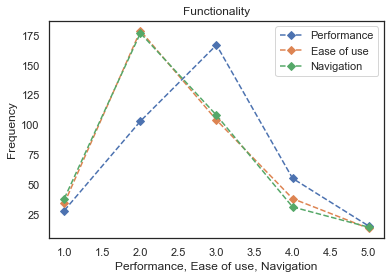

In [38]:
x= [1.0,2.0,3.0,4.0,5.0]# 1 stands for strongly agree, agree, not decided, disagree and strongly disagree.
q4s3=[28,103,167,55,15]
q4s4=[34,179,104,38,13]
q4s5=[38,177,108,31,14]
plt.plot(x,q4s3, linestyle= 'dashed', marker='D', label='Performance')
plt.plot(x,q4s4, linestyle= 'dashed', marker='D',label='Ease of use' )
plt.plot(x,q4s5, linestyle= 'dashed', marker='D',label='Navigation' )
plt.title("Functionality")
plt.ylabel('Frequency')
plt.xlabel('Performance, Ease of use, Navigation')
plt.legend()
plt.show()
#q4s3 is for performance, q4s4 is for Ease of use and q4s5 is for navigation

#### The application is easy to use and navigate

### AESTHETICS  -  Layout, Graphics, Visual Appeal

In [39]:
#AESTHETICS
g= df["q4s6"].value_counts()
h= df["q4s7"].value_counts()
i= df["q4s8"].value_counts()
i

2.0    154
3.0    130
4.0     38
1.0     35
5.0     11
Name: q4s8, dtype: int64

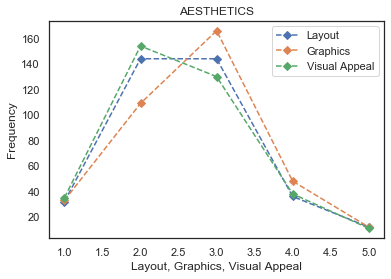

In [40]:
x= [1.0,2.0,3.0,4.0,5.0]# 1 stands for strongly agree, agree, not decided, disagree and strongly disagree.
q4s6=[32,144,144,36,12]
q4s7=[33,109,166,48,12]
q4s8=[35,154,130,38,11]
plt.plot(x,q4s6, linestyle= 'dashed', marker='D', label='Layout')
plt.plot(x,q4s7, linestyle= 'dashed', marker='D',label='Graphics' )
plt.plot(x,q4s8, linestyle= 'dashed', marker='D',label='Visual Appeal' )
plt.title("AESTHETICS")
plt.ylabel('Frequency')
plt.xlabel('Layout, Graphics, Visual Appeal')
plt.legend()
plt.show()

#### This analysis shows that the app looks good and have a good layout.

### PRIVACY, ETHICS and INFORMATION - Visual, Quality, Credibility, Confidentiality and privacy, ethical

In [41]:
j= df["q4s9"].value_counts()
k= df["q4s10"].value_counts()
l= df["q4s11"].value_counts()
m= df["q4s12"].value_counts()
n= df["q4s13"].value_counts()
j

3.0    162
2.0    133
4.0     40
1.0     22
5.0     11
Name: q4s9, dtype: int64

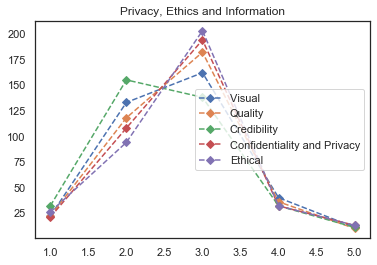

In [42]:
q4s9=[22,133,162,40,11]
q4s10=[22,118,182,36,10]
q4s11=[32,155,138,32,11]
q4s12=[21,108,194,32,13]
q4s13=[26,94,203,32,13]
plt.plot(x,q4s9, linestyle= 'dashed', marker='D', label='Visual ')
plt.plot(x,q4s10, linestyle= 'dashed', marker='D',label='Quality' )
plt.plot(x,q4s11, linestyle= 'dashed', marker='D',label='Credibility' )
plt.plot(x,q4s12, linestyle= 'dashed', marker='D',label='Confidentiality and Privacy' )
plt.plot(x,q4s13, linestyle= 'dashed', marker='D',label='Ethical' )
plt.title("Privacy, Ethics and Information")
plt.legend()
plt.show()

#### Overall Rating

In [43]:
o= df["q4s14"].value_counts()
p= df["q4s15"].value_counts()
o

2.0    158
3.0    143
1.0     32
4.0     24
5.0     11
Name: q4s14, dtype: int64

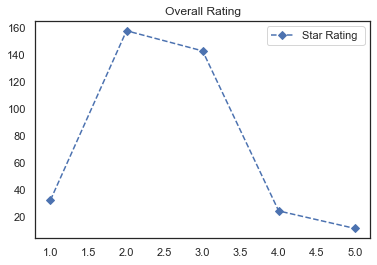

In [52]:
x= [1.0,2.0,3.0,4.0,5.0]
q4s14=[32,158,143,24,11]
q4s15=[25,133,160,36,14]
plt.plot(x,q4s14, linestyle= 'dashed', marker='D', label='Star Rating ')
plt.title("Overall Rating")
plt.legend()
plt.show()

#### This analysis shows that the  application is well rated and of good performance.

## SUMMARY

### All participants had to have utilized mHealth apps, which means they had to be familiar with them and have used them. I filtered out incomplete questionnaires and got 368 valid responses. I calculated the demographics characteristics of every response, and I found that 54.6 percent of participants were females and 45.4 percent were males.

### 50.54% of participants belonged to  the 40-49 age group and 50-59 age group. 61.1% of the participants were married and 38.9% were single, 52.7% of partcipants were with kids and 47.3% were with no kids. Most participants in this study were part time workers.

### The prefecture with the highest number of participants is Tokyo and by region is Kanto. Most participants make use of Android O.S version which was downloaded from online. 33.4% of the participants used the mHealth application for Monitoring, 19.8% used it for Fitness, 14.1% used it for diagnosis, 13% used it for Education, 1.9% used it for Treatment and 17.7% used it for other purposes. 
### The analysis shows that the app was entertaining, looks good, has a good layout, easy to use and navigate. Also, the mHealth application is well rated of its good performance. 
